###  Figure 5B
<p> The following code will generate an X-Y plot to explore the relationship of the mean differences between N2 and mutant strains (PR678, CX10 and PR678:CX10 double) relative to the null reference conditions (DMSO:DMSO, DMSO:H2O) </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
mwu_CXPR = pd.read_csv('C:/Users/Emily/Documents/NP_manuscript/data/S1F1_analysis.csv', index_col=0)
gn_dmso = pd.read_csv('C:/Users/Emily/Documents/S1F2/GN960_mdiff.csv', index_col=0)
gn_h2o = pd.read_csv('C:/Users/Emily/Documents/S1F2/GN960_H2O_mdiff.csv', index_col=0)

In [172]:
def add_gn(row, gn):
    vals = gn.loc[gn['test']==row['test'],['difference','bca_low', 'bca_high' ,'pvalue_mann_whitney']].values.tolist()
    if len(vals) > 0:
        diff = vals[0][0]
        interval = (vals[0][1], vals[0][2])
        mwu = vals[0][3]
        return [diff, interval, mwu]
    else:
        pass
 

In [145]:
mwu_CXPR[['GN960 DMSO diff', 'GN960 DMSO Interval', 'GN960 DMSO MWUp']] = (mwu_CXPR.apply(lambda row: add_gn(row, gn_dmso), 
                                                                                            axis=1, result_type='expand'))

mwu_CXPR[['GN960 H2O diff', 'GN960 H2O Interval', 'GN960 H2O MWUp']] = (mwu_CXPR.apply(lambda row: add_gn(row, gn_h2o), 
                                                                                            axis=1, result_type='expand'))

In [177]:
refs=['Isoamyl alcohol', 'Diacetyl', 'DMSO', 'H2O', '1-octanol', '2-nonanone']
def add_ref(row):
    if row['test'] in refs:
        v = 1
    else:
        v=0
    return v

mwu_CXPR['Reference'] = (mwu_CXPR.apply(lambda row: add_ref(row), axis=1))


,test,CX10 p,PR678 p,CX10 DMSO diff,CX10 H2O diff,PR678 H2O diff,PR678 DMSO diff,PR678 DMSO Interval,PR678 H2O Interval,CX10 H2O Interval,...,N2 H2O Interval,N2 H2O diff,N2 DMSO diff,GN960 DMSO diff,GN960 DMSO Interval,GN960 DMSO MWUp,GN960 H2O diff,GN960 H2O Interval,GN960 H2O MWUp,Reference
0,Isoamyl alcohol,4.018580e-04,3.750000e-70,11.588709,10.501430,-0.410686,3.405011,"(2.269446421151281, 4.578689659761784)","(-1.7375621750749208, 0.8832075371590316)","(9.269114196729785, 11.788063438071609)",...,"(12.342214487404354, 15.152459729850822)",13.748583,14.166999,-1.151320,"(-2.044904206, -0.254584379)",0.011032,0.015892,"(-0.9180418052800896, 0.9139759300941902)",0.839295,1
1,2-Methyl-1-butanol,5.887887e-03,1.930000e-38,10.463591,9.376312,-2.093066,1.722631,"(0.3246224799313716, 3.0588735208126856)","(-3.572603871087906, -0.6125477083639903)","(8.082474035546772, 10.646512480169578)",...,"(9.4364907103215, 12.980728597747484)",11.293831,11.712247,-2.090040,"(-3.37971241, -0.734685892)",0.000070,-0.922827,"(-2.209787661071685, 0.4256264852007025)",0.027984,0
2,Thiophene,4.370000e-30,1.580000e-32,1.159964,0.072685,-0.890885,2.924812,"(1.5720104335509804, 4.242355712021323)","(-2.308103935582196, 0.5602164219375914)","(-1.2267535316774183, 1.4196067114402495)",...,"(7.722647176527296, 10.902977032421507)",9.341482,9.759898,-1.322190,"(-2.19010104, -0.427219984)",0.006999,-0.154977,"(-1.0288310165395398, 0.7615155756402989)",0.829631,0
3,"2,3-Dihydrobenzofuran",1.004970e-01,4.260000e-08,9.456101,8.368822,3.533378,7.349075,"(6.075515831815399, 8.613350966284276)","(2.1315644180154294, 4.941991922565149)","(7.16056127073061, 9.607433981066457)",...,"(7.164180103366539, 10.309801232387606)",8.776051,9.194467,-1.424593,"(-2.399987833, -0.475890395)",0.010270,-0.257380,"(-1.2175240542578576, 0.7078346686495911)",0.898088,0
4,Diacetyl,2.900000e-13,1.911768e-01,2.800677,1.713398,5.631983,9.447680,"(8.16262187083799, 10.738549186049864)","(4.202252743686191, 6.998393566062379)","(0.4301688042000953, 3.028793077083438)",...,"(6.171452160016362, 9.054839434658714)",7.600365,8.018781,-0.553237,"(-1.466759724, 0.298942046)",0.146505,0.613976,"(-0.2576717514535728, 1.4747528619845125)",0.182052,1


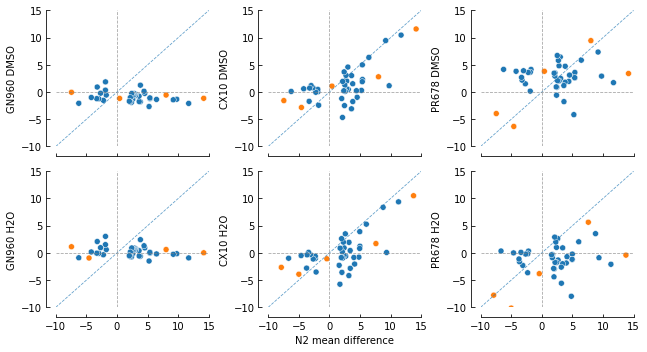

In [188]:
fig, axes = plt.subplots(figsize=(9,5), nrows=2, ncols=3,  sharex=True )

for ax in axes.ravel():
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', linewidth= .8, alpha = .7)
    ax.set_xlim(-10,15)
    ax.set_ylim(-10, 15)
    ax.axvline(x=0, linestyle='--', color='gray', linewidth= .8, alpha = .7)
    ax.axhline(y=0, linestyle='--', color='gray', linewidth= .8, alpha = .7)
    ax.tick_params(axis="both", direction="in")
    #ax.set_aspect('equal')

    

sns.scatterplot(x="N2 DMSO diff", y= "GN960 DMSO diff", hue='Reference', data=mwu_CXPR, ax=axes[0,0], legend=False)
axes[0,0].set_xlabel('N2 mean difference')
axes[0,0].set_ylabel('GN960 DMSO') 
    
sns.scatterplot(x="N2 DMSO diff", y= "CX10 DMSO diff", hue='Reference', data=mwu_CXPR, ax=axes[0,1], legend=False)
axes[0,1].set_xlabel('N2 mean difference')
axes[0,1].set_ylabel('CX10 DMSO')  

sns.scatterplot(x="N2 DMSO diff", y= "PR678 DMSO diff", hue='Reference', data=mwu_CXPR, ax=axes[0,2], legend=False)
axes[0,2].set_xlabel('N2 mean difference')
axes[0,2].set_ylabel('PR678 DMSO')


sns.scatterplot(x="N2 DMSO diff", y="GN960 H2O diff", hue='Reference', data=mwu_CXPR, ax=axes[1,0], legend=False)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('GN960 H2O')

sns.scatterplot(x="N2 H2O diff", y="CX10 H2O diff", hue='Reference', data=mwu_CXPR, ax = axes[1,1], legend=False)
axes[1,1].set_xlabel('N2 mean difference')
axes[1,1].set_ylabel('CX10 H2O')

sns.scatterplot(x="N2 H2O diff", y="PR678 H2O diff", hue='Reference', data=mwu_CXPR, ax = axes[1,2], legend=False)
axes[1,2].set_xlabel('')
axes[1,2].set_ylabel('PR678 H2O')

sns.despine(offset=10)
plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/X_Y_meandiff.svg')